#  YOLOv8 Training — Without Augmentation

**Objective:** Train the YOLOv8 model on brain tumor MRI images without using any data augmentation.  
This will serve as our **baseline** for comparison with the augmented model.

**YAML file used:** `data.yaml`


In [6]:
# Import necessary libraries
from ultralytics import YOLO
import torch
import os


In [5]:
# Load a YOLOv8 model (choose version: n, s, m, l, or x)
# "n" = nano (fastest, smaller), "s" = small (balanced), "m" = medium (stronger)
model = YOLO("yolov8s.pt")  # pretrained on COCO


In [ ]:
# Train using the data.yaml file (no augmentation)

# because i trained the model in google colabe i keept the paths i used there 

results = model.train(
    data="/content/data.yaml",         
    epochs=50,                
    imgsz=640,                 
    batch=32,                  
    name="yolo_brain_noaug",   
    project="models",     
    workers=4,                 
    patience=7,               
    lr0=0.001,
    lrf=0.01,
    optimizer="Adam",
    weight_decay=0.0005,
    save=True,
)



In [7]:
# Save model weights
model_path = "../models/yolo_brain_noaug/weights/best.pt"
if os.path.exists(model_path):
    print(f" Model saved successfully at: {model_path}")
else:
    print(" Model file not found. Check training output folders.")


 Model saved successfully at: ../models/yolo_brain_noaug/weights/best.pt


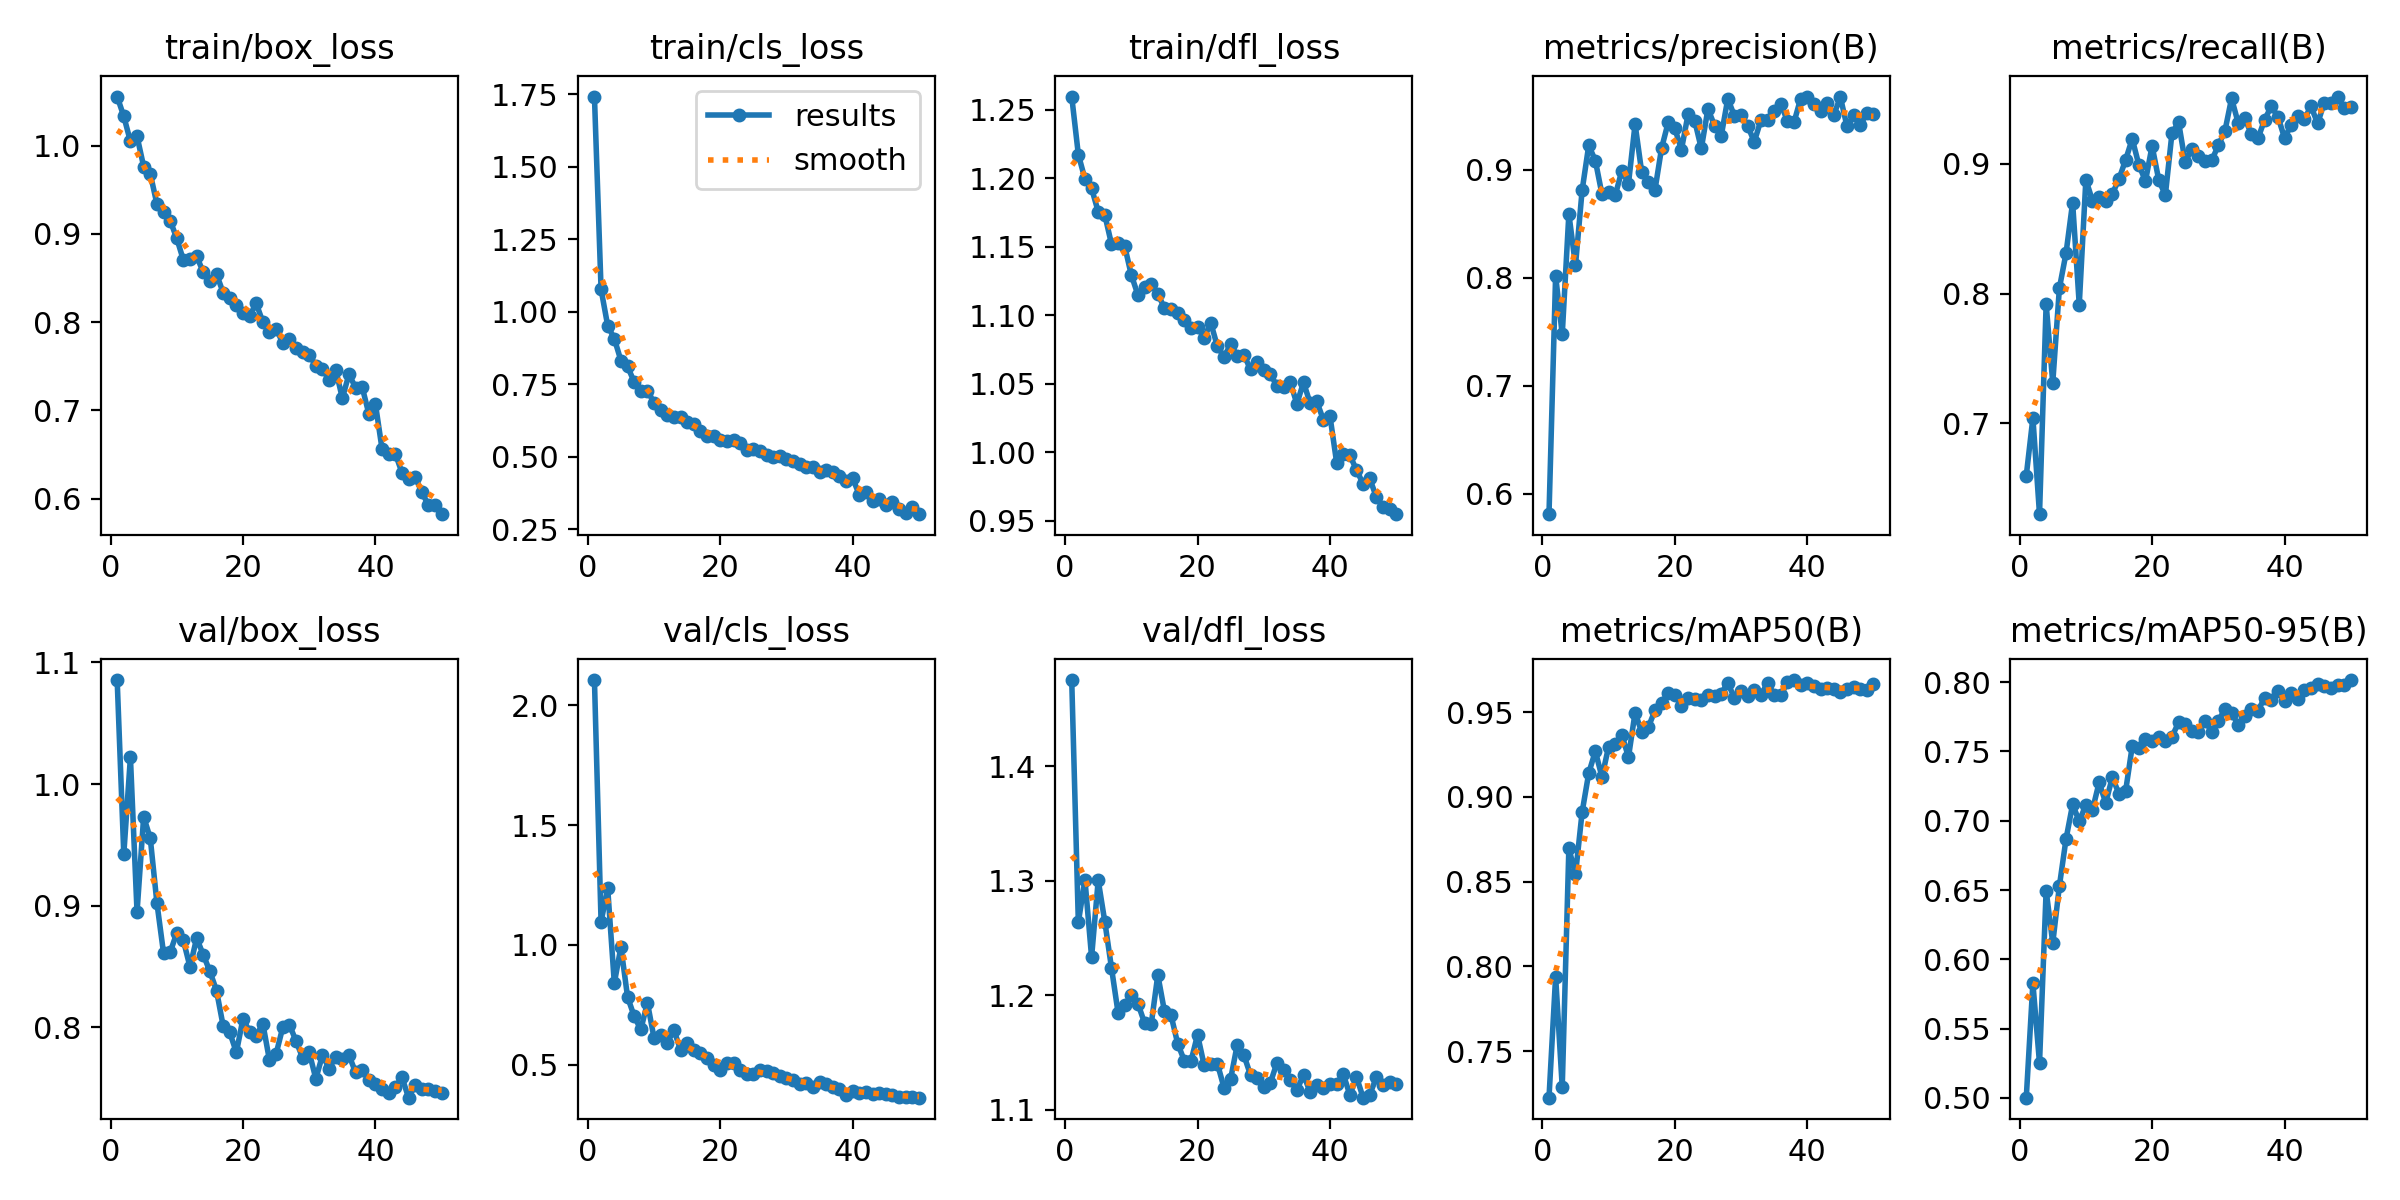

In [20]:
# Display training metrics (if running in Jupyter)
from IPython.display import Image, display

display(Image(filename="../models/yolo_brain_noaug/results.png"))


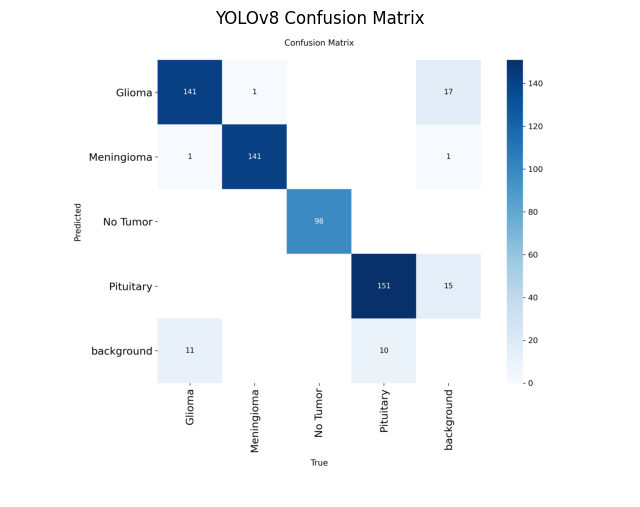

In [21]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the saved confusion matrix image
img = mpimg.imread("../models/yolo_brain_noaug/confusion_matrix.png")

plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis("off")
plt.title("YOLOv8 Confusion Matrix")
plt.show()


In [ ]:
# Evaluate model performance
model = YOLO(model_path)

metrics = model.val(
    data="../configs/data.yaml",
    project="../models",
    name="brain_eval",
    exist_ok=True
)



Ultralytics 8.3.220  Python-3.13.7 torch-2.9.0+cpu CPU (Intel Core Ultra 7 165H)
Model summary (fused): 72 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access  (ping: 0.10.0 ms, read: 1.30.3 MB/s, size: 19.1 KB)
val: Scanning C:\Users\kaout\OneDrive\Desktop\spint_1\MultiModal-Diagnosis-AI\data\data_yolo\labels\val.cache... 510 images, 1 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 510/510 381.8Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 32/32 0.4it/s 1:152.2sss
                   all        510        554      0.951      0.944      0.966      0.802
                Glioma        135        153      0.913      0.891      0.939      0.762
            Meningioma        140        142      0.986      0.993      0.994      0.849
              No Tumor         98         98          1      0.995      0.995      0.848
             Pituitary        154        161      0.906      0.895      0.938  

In [14]:
print("mAP50:", metrics.box.map50)
print("mAP50-95:", metrics.box.map)
print("Precision:", metrics.box.mp)
print("Recall:", metrics.box.mr)


mAP50: 0.9664276008926711
mAP50-95: 0.8017135330171143
Precision: 0.95105738280238
Recall: 0.9436267609994038


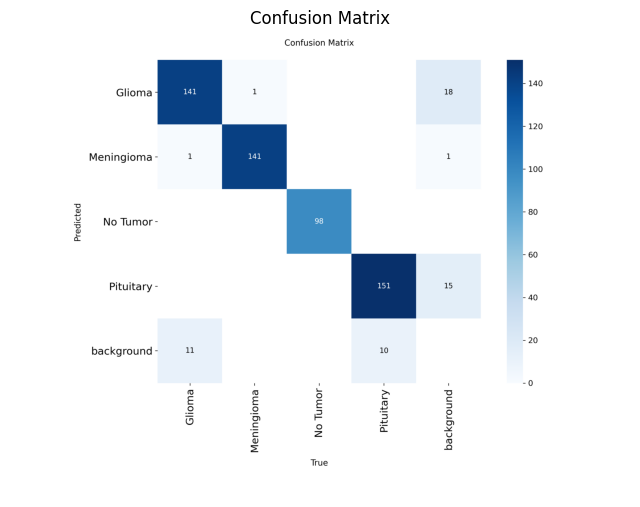

In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Example: show confusion matrix
img = mpimg.imread("../models/brain_eval/confusion_matrix.png")
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis("off")
plt.title("Confusion Matrix")
plt.show()


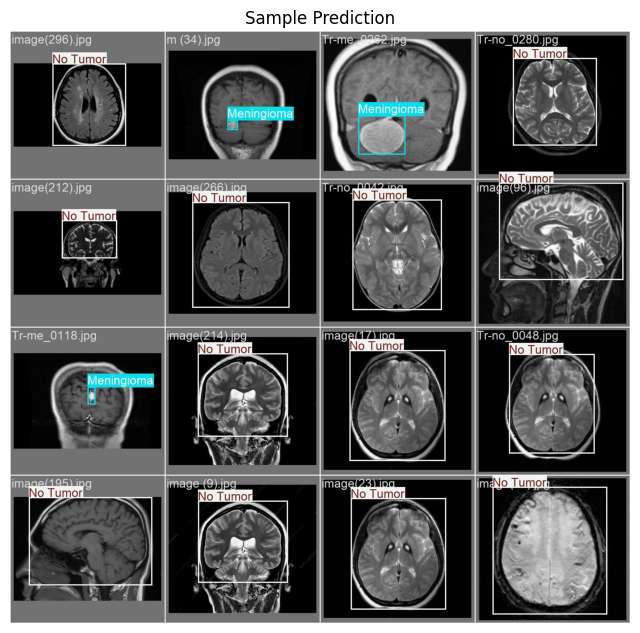

In [19]:
import glob

# Get one sample prediction image
image_path = glob.glob("../models/brain_eval/*.jpg")[0]

img = mpimg.imread(image_path)
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis("off")
plt.title("Sample Prediction")
plt.show()


##  Summary

- Model trained **without augmentation**
- Used `data.yaml`
- Training logs and weights saved in: `runs/detect/yolo_brain_noaug/`
- Next step: compare performance with the augmented model in `yolo_training_aug.ipynb`
